In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [7]:
boston_dataset = load_boston()

In [9]:
df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [23]:
df.shape

(506, 13)

In [31]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [26]:
df.head(600)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.5380,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.4690,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.5240,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.5240,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.5240,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.5240,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


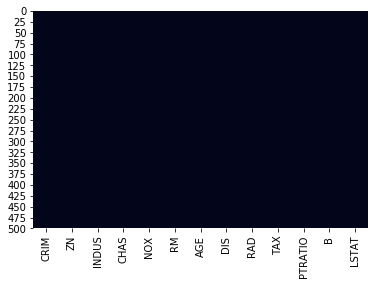

In [27]:
sns.heatmap(df.isna(), cbar=False)

In [30]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [34]:
df.CRIM.value_counts()

14.33370    2
0.01501     2
0.08265     1
0.53700     1
1.35472     1
0.14103     1
0.03502     1
0.03615     1
0.66351     1
0.12650     1
0.10469     1
0.25356     1
0.10000     1
0.05515     1
0.11027     1
4.26131     1
0.34109     1
22.59710    1
0.28955     1
4.34879     1
0.10574     1
3.47428     1
0.02009     1
0.14866     1
5.66637     1
15.87440    1
0.04297     1
0.78570     1
0.29090     1
1.23247     1
2.44953     1
0.97617     1
9.96654     1
0.36894     1
0.04294     1
0.16439     1
0.17899     1
0.16760     1
5.29305     1
0.12816     1
0.03548     1
8.79212     1
5.87205     1
14.23620    1
0.08387     1
0.03738     1
0.03932     1
0.62739     1
0.10008     1
0.02875     1
0.14231     1
0.40202     1
0.57529     1
0.01432     1
1.05393     1
0.09266     1
0.11132     1
0.22489     1
0.33147     1
0.53412     1
0.02899     1
0.82526     1
0.09512     1
0.05425     1
0.17783     1
1.13081     1
5.44114     1
0.06129     1
0.25199     1
0.01965     1
5.73116     1
0.0646

In [59]:
df.AGE.value_counts()

100.0    43
96.0      4
98.2      4
95.4      4
97.9      4
87.9      4
98.8      4
94.1      3
88.0      3
21.4      3
96.2      3
98.9      3
97.3      3
32.2      3
97.0      3
92.6      3
36.6      3
97.4      3
95.6      3
76.5      3
94.5      2
91.9      2
6.6       2
77.7      2
18.5      2
21.9      2
84.1      2
94.6      2
82.6      2
93.6      2
34.5      2
28.9      2
53.6      2
82.5      2
58.7      2
18.4      2
79.9      2
98.1      2
70.4      2
31.1      2
65.2      2
94.3      2
96.7      2
27.7      2
79.2      2
93.9      2
96.6      2
98.3      2
70.6      2
76.7      2
91.0      2
98.4      2
47.2      2
94.7      2
93.8      2
91.8      2
80.8      2
93.3      2
52.3      2
45.8      2
96.1      2
61.5      2
85.4      2
92.9      2
54.3      2
88.5      2
82.9      2
7.8       2
95.0      2
95.3      2
32.0      2
90.8      2
85.1      2
92.4      2
87.3      2
17.5      2
41.1      2
86.5      2
88.4      2
91.2      2
59.7      2
90.0      2
31.9      2
83.0

In [43]:
df[['AGE', 'CRIM']].describe()

,AGE,CRIM
count,506.000000,506.000000
mean,68.574901,3.613524
std,28.148861,8.601545
min,2.900000,0.006320
25%,45.025000,0.082045
50%,77.500000,0.256510
75%,94.075000,3.677083
max,100.000000,88.976200


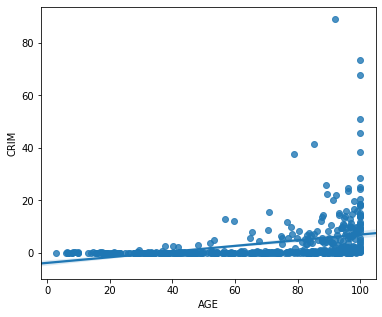

In [48]:
plt.figure(figsize=(6,5))
sns.regplot(df.AGE, df.CRIM)

In [71]:
a = df[(df['AGE'] < 100) & (df['AGE'] > 70) & (df['CRIM'] > 1) & (df['CRIM'] < 30)]

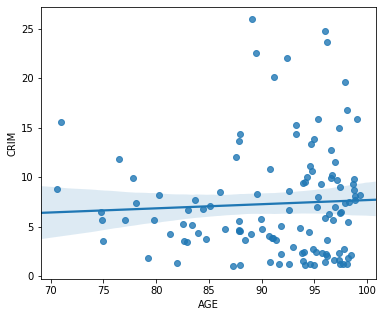

In [72]:
plt.figure(figsize=(6,5))
sns.regplot(a.AGE, a.CRIM)

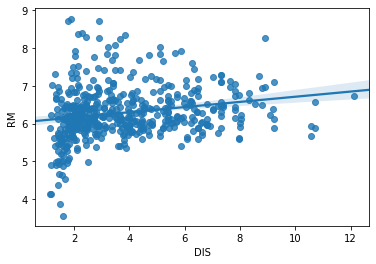

In [75]:
sns.regplot(df.DIS, df.RM)

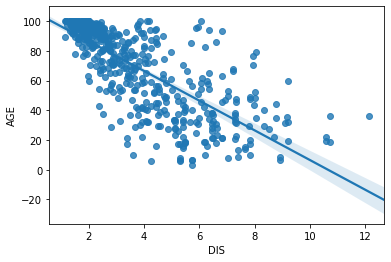

In [77]:
sns.regplot(df.DIS, df.AGE)